In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multiclass-diabetes-dataset/Multiclass Diabetes Dataset/Multiclass Diabetes Dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv("/kaggle/input/multiclass-diabetes-dataset/Multiclass Diabetes Dataset/Multiclass Diabetes Dataset.csv")

In [4]:
df.head(20)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
5,1,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,0
6,1,43,2.6,67,4.0,3.8,0.9,2.4,3.7,1.0,21.0,0
7,0,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24.0,0
8,0,31,4.4,55,4.2,3.6,0.7,1.7,1.6,0.3,23.0,0
9,0,33,3.3,53,4.0,4.0,1.1,0.9,2.7,1.0,21.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [6]:
df.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


In [7]:
df.shape

(264, 12)

In [8]:
df.isna().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
Class     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns


Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'Class'],
      dtype='object')

In [11]:
df.groupby('Class')['Gender'].value_counts()

Class  Gender
0      0         58
       1         38
1      1         27
       0         13
2      1         79
       0         49
Name: count, dtype: int64

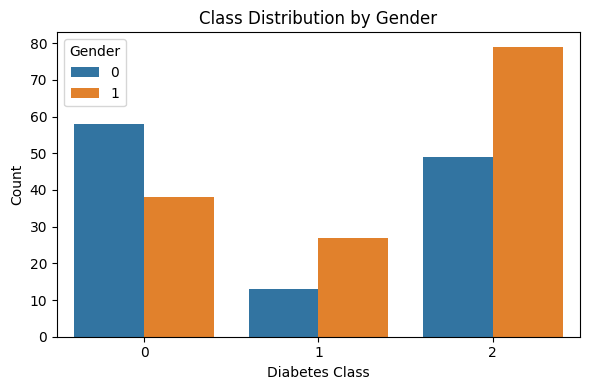

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class', hue='Gender')
plt.title("Class Distribution by Gender")
plt.xlabel("Diabetes Class")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [13]:
for col in df:
    print(col)
    print(f"min = {df[col].min()} ....max = {df[col].max()} ....nunique = {df[col].nunique()} ")

Gender
min = 0 ....max = 1 ....nunique = 2 
AGE
min = 25 ....max = 77 ....nunique = 42 
Urea
min = 1.1 ....max = 26.4 ....nunique = 83 
Cr
min = 6 ....max = 800 ....nunique = 90 
HbA1c
min = 0.9 ....max = 14.6 ....nunique = 74 
Chol
min = 0.0 ....max = 9.5 ....nunique = 57 
TG
min = 0.6 ....max = 8.7 ....nunique = 45 
HDL
min = 0.4 ....max = 4.0 ....nunique = 25 
LDL
min = 0.3 ....max = 5.6 ....nunique = 45 
VLDL
min = 0.2 ....max = 31.8 ....nunique = 33 
BMI
min = 19.0 ....max = 43.25 ....nunique = 38 
Class
min = 0 ....max = 2 ....nunique = 3 


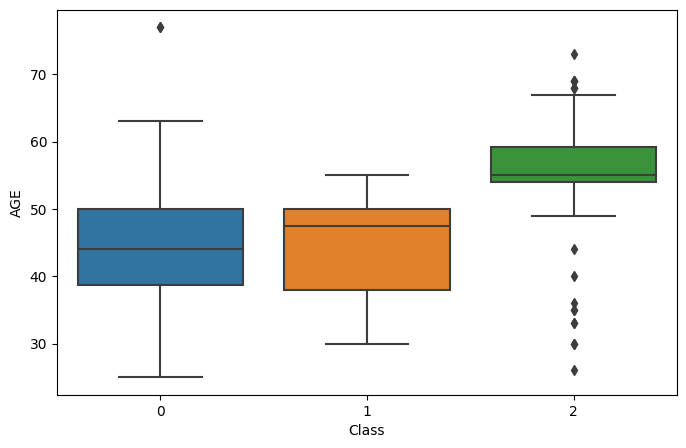

In [14]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Class', y='AGE')
plt.show()



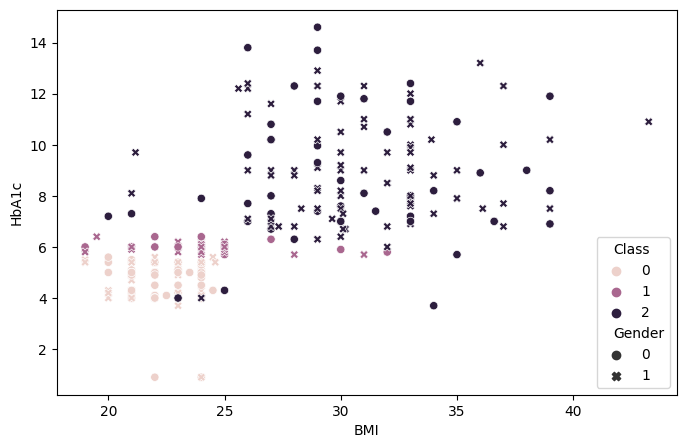

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='BMI', y='HbA1c', hue='Class', style='Gender')
plt.show()

In [16]:
df.corr()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
Gender,1.000000,0.143539,0.137249,0.170363,0.158350,0.025585,0.151293,-0.170715,0.023658,0.172111,0.137695,0.196158
AGE,0.143539,1.000000,0.201437,0.181714,0.446522,0.042347,0.216292,-0.074133,-0.018473,0.021822,0.553619,0.514331
Urea,0.137249,0.201437,1.000000,0.737770,0.139824,0.035962,0.165082,-0.078677,0.015097,-0.002175,0.241978,0.232363
Cr,0.170363,0.181714,0.737770,1.000000,0.113639,0.002475,0.168173,-0.015508,0.046571,-0.002497,0.254953,0.209028
HbA1c,0.158350,0.446522,0.139824,0.113639,1.000000,0.250896,0.218956,0.005604,-0.105121,0.144054,0.614643,0.771993
Chol,0.025585,0.042347,0.035962,0.002475,0.250896,1.000000,0.265536,0.044228,0.435670,0.110721,0.175445,0.262123
TG,0.151293,0.216292,0.165082,0.168173,0.218956,0.265536,1.000000,-0.081876,0.119850,0.199193,0.297110,0.313029
HDL,-0.170715,-0.074133,-0.078677,-0.015508,0.005604,0.044228,-0.081876,1.000000,-0.141959,-0.081158,0.044538,-0.029850
LDL,0.023658,-0.018473,0.015097,0.046571,-0.105121,0.435670,0.119850,-0.141959,1.000000,0.057781,-0.059192,-0.047529
VLDL,0.172111,0.021822,-0.002175,-0.002497,0.144054,0.110721,0.199193,-0.081158,0.057781,1.000000,0.186081,0.156690


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [18]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1000
)

In [19]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Store accuracies
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds) * 100
    accuracy_results[name] = acc
    print(f"Model Accuracies {name}(%): {acc:.2f}%")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracies Logistic Regression(%): 81.13%
Model Accuracies Decision Tree(%): 94.34%
Model Accuracies Random Forest(%): 88.68%
Model Accuracies Support Vector Machine(%): 66.04%
Model Accuracies Naive Bayes(%): 88.68%
Model Accuracies K-Nearest Neighbors(%): 67.92%
